In [1]:
from google.colab import files
uploaded = files.upload()

Saving banking_dirty.csv to banking_dirty.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read and display the first 5 rows.
banking = pd.read_csv("banking_dirty.csv")
banking.head()

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [4]:
# A bit more information and sumaary of our dataset.
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   cust_id           100 non-null    object 
 2   birth_date        100 non-null    object 
 3   Age               100 non-null    int64  
 4   acct_amount       100 non-null    float64
 5   inv_amount        100 non-null    int64  
 6   fund_A            100 non-null    float64
 7   fund_B            100 non-null    float64
 8   fund_C            100 non-null    float64
 9   fund_D            100 non-null    float64
 10  account_opened    100 non-null    object 
 11  last_transaction  100 non-null    object 
dtypes: float64(5), int64(3), object(4)
memory usage: 9.5+ KB


As we can observe we have just 100 entries, One row per each client. <br> It seems we have no missingness.

# ***Data cleaning.***
### ***Data type constraint.***
    First we've to make sure that our columns are in correct type.
<br> ***birth_date, account_opended and Last_transaction columns*** are in object datatype but they contain ***dates***. So, we have to convert them into ***datetime formate*** to make it easier to manipulate.
<br> However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a datetime object, while making sure that the format is inferred and potentially incorrect formats are set to missing. As The 21-14-17 entry is erroneous and leads to an error.


In [5]:
columns= ['birth_date', 'account_opened', 'last_transaction']
for col in columns:
  # Convert account_opened to datetime
    banking[col] = pd.to_datetime(banking[col],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

Verify changes have been effected.

In [6]:
# Get the datatypes of our ccolumns.
banking.dtypes

Unnamed: 0                   int64
cust_id                     object
birth_date          datetime64[ns]
Age                          int64
acct_amount                float64
inv_amount                   int64
fund_A                     float64
fund_B                     float64
fund_C                     float64
fund_D                     float64
account_opened      datetime64[ns]
last_transaction    datetime64[ns]
dtype: object

Extract the year from the amended account_opened column and assign it to the acct_year to create a new column.



In [7]:
# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')
# Print acct_year
banking['acct_year']

0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object

    Cunning calendar cleaning!
<br>Now that the acct_year column is created, a simple question arises, "how many accounts are opened on a yearly?"

In [8]:
banking['acct_year'].value_counts()

2018    58
2017    33
2019     9
Name: acct_year, dtype: int64

For better intution, let's visualiza it.
<br> But first let's set a global style for our graphs.

In [18]:
sns.set(font_scale=1.5, rc={"figure.figsize":(8,6)})
sns.set_style("ticks")

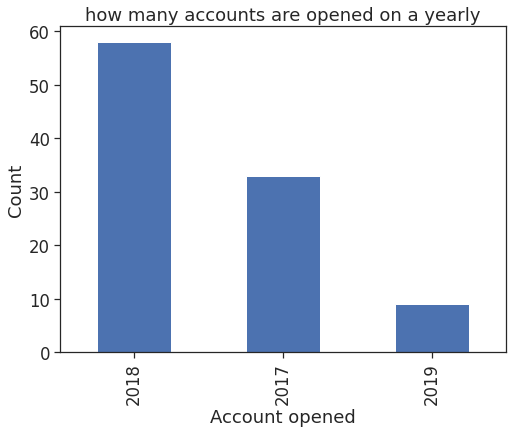

In [19]:
banking['acct_year'].value_counts().plot(kind="bar")
plt.xlabel("Account opened")
plt.ylabel("Count")
plt.title("how many accounts are opened on a yearly")
plt.show()

***Unnamed: 0 and cust_id columns*** contain no useful information. So, we will drop them for memory size reasons.

In [12]:
banking.drop(['Unnamed: 0', 'cust_id'], axis=1, inplace=True)

look at the new form of our dataset.

In [ ]:
banking.head()

,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_year
0,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,2019-02-22,2018
1,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,2018-10-31,2019
2,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,2018-02-04,2018
3,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,2018-08-11,2017
4,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,2018-07-19,2018


Now we need you to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The account_opened column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

### ***Cross validation.***
### How our dataset is integrity?
       A common challenge is data integrity, or more broadly making sure that our data is correct
       inv_amount & Age columns

New data has been merged into the banking DataFrame that contains details on how investments in the inv_amount column are allocated across four different funds A, B, C and D.

Furthermore, the age and birthdays of customers are now stored in the age and birth_date columns respectively.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of inv_amount and age against the amount invested in different funds and customers' birthdays.

Find the rows where the sum of all rows of the fund_columns in banking are equal to the inv_amount column.

In [13]:
banking[['inv_amount', 'fund_A', 'fund_B', 'fund_C', 'fund_D']].head()

,inv_amount,fund_A,fund_B,fund_C,fund_D
0,51295,30105.0,4138.0,1420.0,15632.0
1,15050,4995.0,938.0,6696.0,2421.0
2,24567,10323.0,4590.0,8469.0,1185.0
3,23712,3908.0,492.0,6482.0,12830.0
4,93230,12158.4,51281.0,13434.0,18383.0


In [14]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis = 1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv, inconsistent_inv = banking[inv_equ], banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


We will manually calculate customers' ages. But because our dataset has been collected in 2020, we will suptract the customers' ages from 2020.<br> Find all rows of banking where the age column is equal to ages_manual and then filter banking into consistent_ages and inconsistent_ages.


In [15]:
# our dataset has been collected in 2020
ages_manual = 2020 - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = banking['Age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages, inconsistent_ages = banking[age_equ], banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  8


Awesome work! There are only 8 and 8 rows affected by inconsistent inv_amount and age values respectively. In this case, it's best to investigate the underlying data sources before deciding on a course of action!

Another way to verify or investigate the correctness of  the age of customers. <br> We have the date of birth of each customer and it;s assumed that all those born in the same year nearly have the same age, and from this principle we'll extract the year in which all the customers were born and check whether the same customers were born in the same year same age or not.

In [33]:
banking["birth_year"] = banking["birth_date"].dt.strftime('%Y')

pd.DataFrame(banking.groupby(by=[ "birth_year"]).Age.value_counts())

Age
birth_year Age     
1961       59     2
           63     1
1962       58     6
1963       57     4
1965       55     2
1966       54     2
1967       53     3
1968       52     3
           56     1
1969       51     2
1970       50     3
1971       49     2
1972       48     5
1973       47     3
1974       46     8
           50     1
1975       45     3
           49     2
1976       44     1
1977       43     1
1978       42     3
1979       41     1
1980       40     2
1981       39     2
1982       38     2
1983       37     2
1984       36     4
1985       35     1
1986       34     1
1987       33     2
1988       32     1
           36     1
1989       31     6
1990       30     3
           34     2
1991       29     3
1992       28     6
1993       27     3

As we can observe, We've different samples born in the same year but have different age, And this is so weird !
<br> But for better intution let's convert this table into a nicer looking chart.
<br> But first let's create a new feature to easy highlight the samples with not correct recorded ages.

In [20]:
ages_manual = 2020 - banking['birth_date'].dt.year

# Create a copy from our dataset.
banking_copy= banking.copy()

# Find rows where age column == ages_manual
banking_copy["age_validation"] = banking_copy['Age'] == ages_manual
banking_copy.head()

,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_year,birth_year,age_validation
0,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,2019-02-22,2018,1962,True
1,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,2018-10-31,2019,1962,True
2,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,2018-02-04,2018,1990,False
3,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,2018-08-11,2017,1985,True
4,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,2018-07-19,2018,1990,True


In [21]:
banking_copy.sort_values("birth_year", inplace=True)
banking_copy["age_validation"]= banking_copy["age_validation"].replace({False:"Error recorder", True:"correct"})

In [22]:
banking_copy.age_validation.value_counts()

correct           92
Error recorder     8
Name: age_validation, dtype: int64

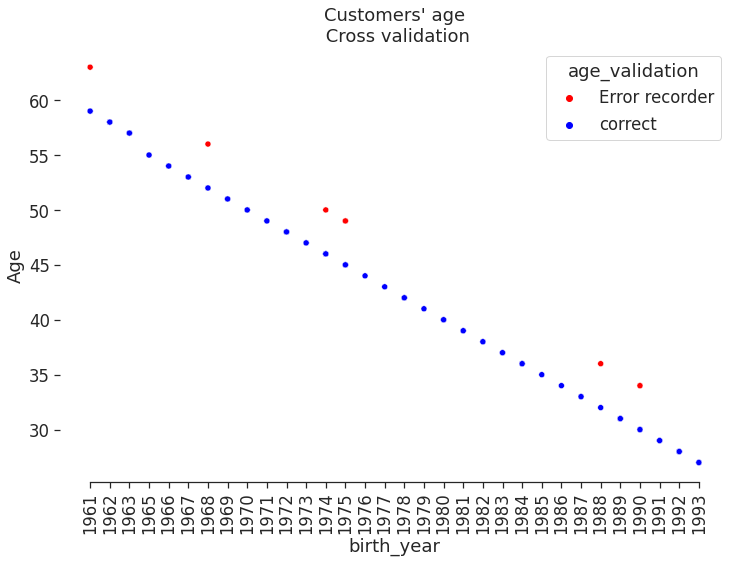

In [36]:
plt.figure(figsize=(12,8))
banking_copy.sort_values(by="birth_year", inplace=True)
sns.scatterplot(x = "birth_year", y = "Age", data = banking_copy, hue = "age_validation", 
                palette={"correct":"blue", "Error recorder":"red"})
sns.despine(trim=True, left=True)
plt.title("Customers' age\n Cross validation")
plt.xticks(rotation=90)
plt.show()

Doing the same for inv_amoubnt, we will create new column for investment amount validation. from the cell above.  